# Random Forest Classification

In [24]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Read the File

dataset = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
# Feature and label

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# Renaming coloumns with suitable name for better understanding of dataset

dataset.columns = ['PN', 'PGC', 'BP', 'SFT', 'SI', 'BMI' , 'DPF', 'Age', 'Class'] 

In [5]:
# Showing starting rows from dataset as sample

dataset.head()

,PN,PGC,BP,SFT,SI,BMI,DPF,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
# Checking if any null values are present or not

dataset.isna().sum()

PN       0
PGC      0
BP       0
SFT      0
SI       0
BMI      0
DPF      0
Age      0
Class    0
dtype: int64

In [7]:
# Brief statistical analysis

dataset.describe()

,PN,PGC,BP,SFT,SI,BMI,DPF,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Features shape
# 767 rows and 8 coloumns
X.shape

(767, 8)

In [9]:
# Label shape
# 767 rows , 1 colomn
y.shape

(767,)

In [10]:
# Splitting the dataset into the Training set and Test set
# 75% Train data
# 25% Test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
# Training the Random Forest Classification model on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [12]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[116  15]
 [ 34  27]]


In [13]:
print("Model Accuracy:", accuracy_score(y_test, y_pred)*100)

Model Accuracy: 74.47916666666666


In [14]:
from sklearn import metrics
# Print a classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       131
           1       0.64      0.44      0.52        61

    accuracy                           0.74       192
   macro avg       0.71      0.66      0.67       192
weighted avg       0.73      0.74      0.73       192



In [15]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

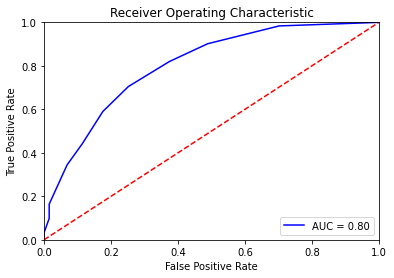

In [16]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [17]:
# feature reduction using Principal Component Analysis (PCA) for visualizaing into 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_test)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [18]:
# adding class attribute

principalDf['class']= y_pred


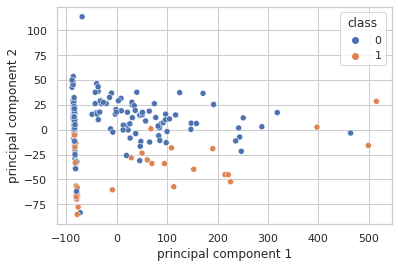

In [22]:
# seaborn lib import

import seaborn as sns
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.scatterplot(
    data=principalDf,
    x="principal component 1", y="principal component 2",
    hue="class",
     sizes=(10, 200),
)

In [73]:
# Make an instance of the Model to visualize for depth 2

clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 2)

In [74]:
# Train the model on the data

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [75]:
# define lable for feature (fn= feature name) and class (cn= class name)

fn = ['PN', 'PGC', 'BP', 'SFT', 'SI', 'BMI' , 'DPF', 'Age',] 
cn = ['Diabetic', 'Not Diabetic']

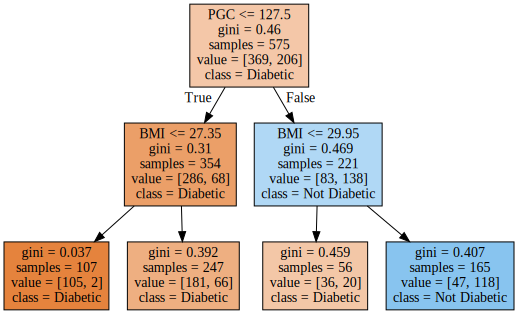

In [79]:
import graphviz

# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)


# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph